In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


We shall try to drop those parameters from our exploratory analysis

In [3]:
df=pd.read_csv('data_final.csv')
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,url,url_length,num_dash,num_dot,num_ampersand,num_percent,num_underscore,num_at,num_hashtag,num_colon,num_semicolon,num_double_dash,num_special_character,num_numeric,num_sensitive_words,path_length,path_level,hostname_length,use_top_domain_level,is_https,has_ip_address,query_length,num_query,num_iframe,num_embed,num_external_url,num_external_domain,num_external_resource_call,num_null_self_redirect_hyperlink,num_submit_info_to_email,is_frequent_domain_name_mismatch,has_insecure_form,num_ext_meta_scipt_link,num_dns_record,num_redirect,num_redirect_diff_domain,right_click_dissabled,has_ext_favicon,is_domain_registered,is_domain_registrar_visible,domain_age,is_indexed,is_ssl_certificated,is_privacy_protected,has_onmouseover,status
0,http://www.crestonwood.com/router.php,37,0,3,0,0,0,0,0,1,0,1,3,0,0,11,1,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,15,1,0,0,0,0
1,https://shadetreetechnology.com/V4/validation/...,78,0,1,0,0,0,0,0,1,0,1,1,17,0,47,3,23,1,1,0,0,0,0,0,1,2,8,0,0,1,0,5,2,1,0,0,0,1,1,18,1,1,0,0,1
2,https://rgipt.ac.in/,20,0,2,0,0,0,0,0,1,0,1,2,0,0,1,1,11,0,1,0,0,0,0,0,66,0,68,5,0,0,0,0,4,1,0,0,0,1,1,16,1,1,0,0,0
3,http://www.iracing.com/tracks/gateway-motorspo...,55,2,2,0,0,0,0,0,1,0,1,4,0,0,33,3,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1,25,1,1,0,0,0
4,https://www.mutuo.it/,21,0,2,0,0,0,0,0,1,0,1,2,0,0,1,1,12,1,1,0,0,0,0,0,11,5,97,0,0,0,0,48,2,1,0,0,1,1,1,23,1,1,0,0,0


In [5]:
y=df['status']
x=df.drop(['status','url','num_percent','num_underscore','num_double_dash','num_hashtag','num_embed','num_redirect_diff_domain',"right_click_dissabled",
           'is_privacy_protected','is_domain_registered','is_domain_registrar_visible','has_onmouseover'],axis=1)
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=42)
print ("Train Set : " , X_train.shape, y_train.shape)
print ("Test Set : " , X_test.shape, y_test.shape)


Train Set :  (3521, 33) (3521,)
Test Set :  (1509, 33) (1509,)


In [6]:
score_method = pd.DataFrame(columns=["Method", "Score"])
def append_method_and_name(method, score):
    global score_method
    score_method = score_method.append({"Method": method, "Score": score}, ignore_index=True)

In [7]:
from sklearn.metrics import f1_score
f1Score=pd.DataFrame(columns=[])
def f1_scores(method, f1score):
    global f1Score
    f1Score=f1Score.append({"Method":method, "F1-Score":f1score},ignore_index=True)

#### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
rf_y_test_pred=rf.predict(X_test)

In [11]:
accuracy_test=[]    
rf_acc = accuracy_score(y_test,rf_y_test_pred)
accuracy_test.append(rf_acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(rf_acc*100))
print(classification_report(y_test,rf_y_test_pred,target_names=['0','1']))

Test Accuracy :  93.64%  
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       940
           1       0.94      0.89      0.91       569

    accuracy                           0.94      1509
   macro avg       0.94      0.93      0.93      1509
weighted avg       0.94      0.94      0.94      1509



In [12]:
append_method_and_name('Random Forest',rf_acc*100)
score_method.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\915219466.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_method = score_method.append({"Method": method, "Score": score}, ignore_index=True)


,Method,Score
0,Random Forest,93.638171


In [13]:
 rf_f1 = f1_score(y_test, rf_y_test_pred)  
 f1_scores('Random Forest',rf_f1*100)
 
 f1Score.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\3397138116.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1Score=f1Score.append({"Method":method, "F1-Score":f1score},ignore_index=True)


,Method,F1-Score
0,Random Forest,91.351351


<AxesSubplot:>

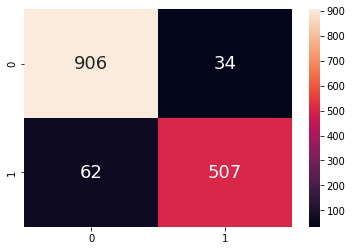

In [14]:
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Results : `9` False Positives and `24` False Negatives

c:\Users\Destyn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Destyn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


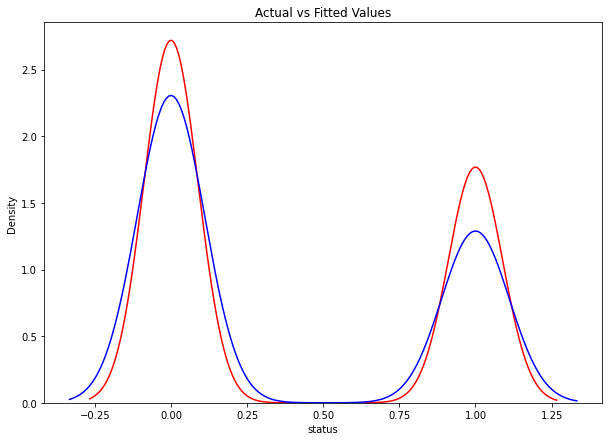

In [15]:
plt.figure(figsize=(10, 7))


ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
sb.distplot(rf_y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


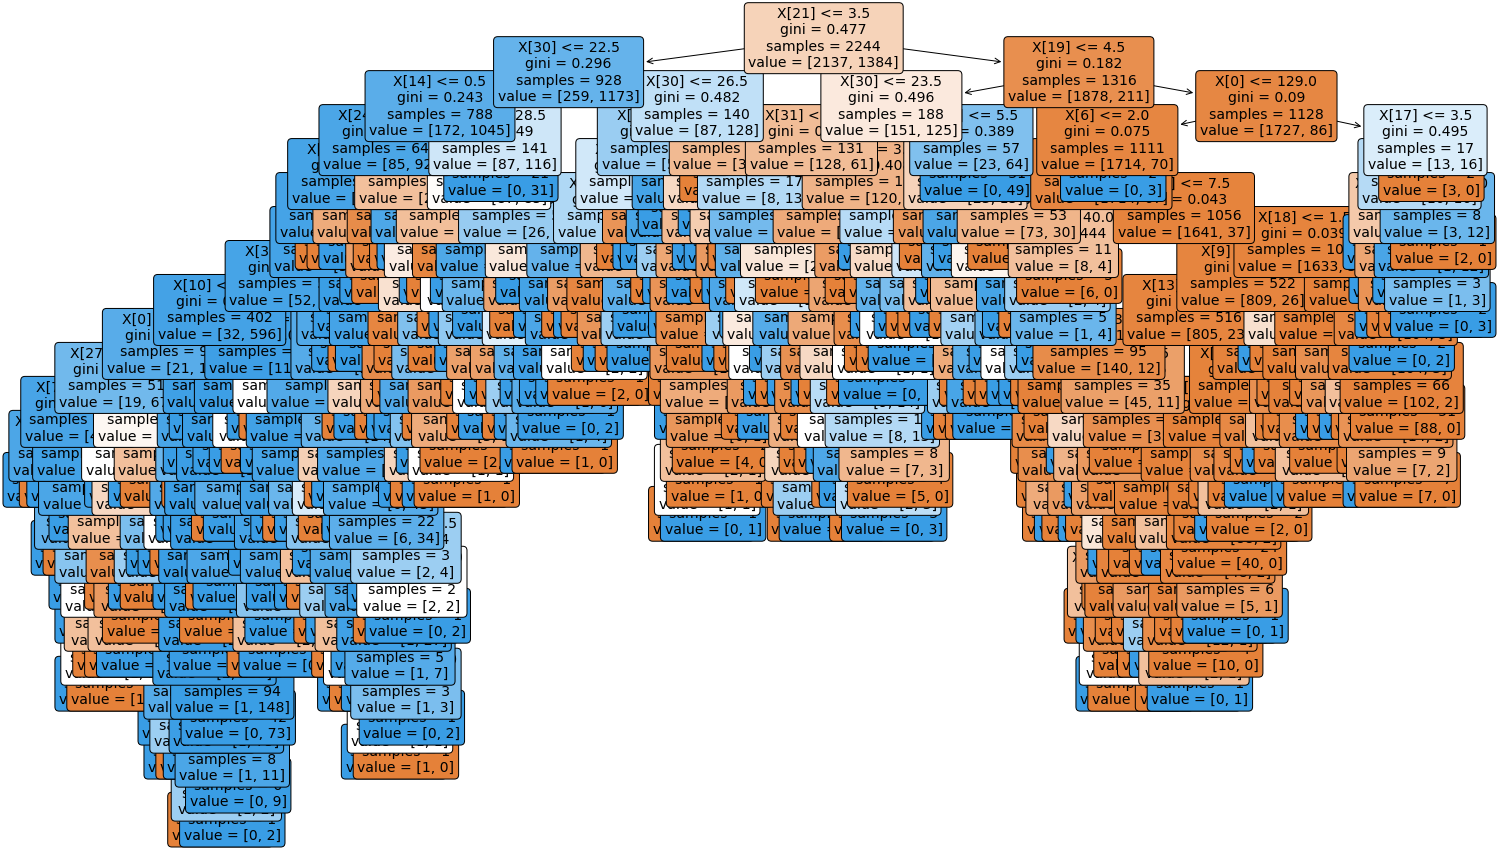

In [17]:
import pydot
# Pull out one tree from the forest
Tree = rf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [18]:
max_depth_range = list(range(1, 40))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    rf = RandomForestClassifier(n_estimators=100,max_depth = depth,
                            random_state = 0)
    rf.fit(X_train, y_train)   
    
    score = rf.score(X_test, y_test)
    r2_list.append(score)

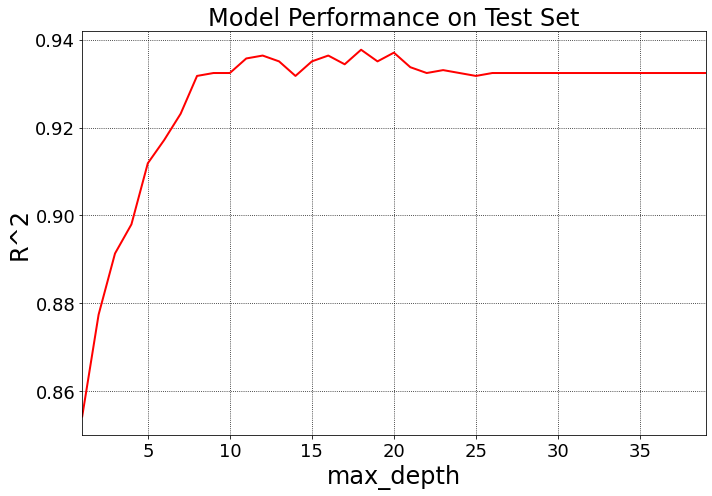

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

In [20]:
best_max_depth=np.argmax(r2_list)
best_max_depth

17

In [21]:
rfBest=RandomForestClassifier(n_estimators=100,max_depth=best_max_depth)
rfBest.fit(X_train.values,y_train)

RandomForestClassifier(max_depth=17)

In [22]:
rfB_y_test_pred=rfBest.predict(X_test)

accuracy_test=[]    
rfB_acc = accuracy_score(y_test,rfB_y_test_pred)
accuracy_test.append(rfB_acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(rfB_acc*100))
print(classification_report(y_test,rfB_y_test_pred,target_names=['0','1']))

Test Accuracy :  93.97%  
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       940
           1       0.95      0.89      0.92       569

    accuracy                           0.94      1509
   macro avg       0.94      0.93      0.93      1509
weighted avg       0.94      0.94      0.94      1509



c:\Users\Destyn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<AxesSubplot:>

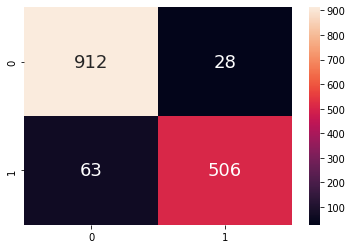

In [23]:
sb.heatmap(confusion_matrix(y_test, rfB_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Logistic Regressions

We identify the problem as a classification problem when independent variables are continuous in nature and the dependent variable is in categorical form

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression(solver='lbfgs', max_iter=2000,multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [26]:
lr_y_test_pred=lr.predict(X_test)
lr_y_train_pred=lr.predict(X_train)

In [27]:
accuracy_test=[]    
lr_acc = accuracy_score(lr_y_test_pred, y_test)
accuracy_test.append(lr_acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(lr_acc*100))
print(classification_report(y_test,lr_y_test_pred,target_names=['0','1']))

Test Accuracy :  91.32%  
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       940
           1       0.88      0.90      0.89       569

    accuracy                           0.91      1509
   macro avg       0.91      0.91      0.91      1509
weighted avg       0.91      0.91      0.91      1509



In [28]:
append_method_and_name('Logistic Regression',lr_acc*100)
score_method.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\915219466.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_method = score_method.append({"Method": method, "Score": score}, ignore_index=True)


,Method,Score
0,Random Forest,93.638171
1,Logistic Regression,91.318754


In [29]:
 lr_f1 = f1_score(y_test, lr_y_test_pred)  
 f1_scores('Logistic Regression',lr_f1*100)
 
 f1Score.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\3397138116.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1Score=f1Score.append({"Method":method, "F1-Score":f1score},ignore_index=True)


,Method,F1-Score
0,Random Forest,91.351351
1,Logistic Regression,88.618593


<AxesSubplot:>

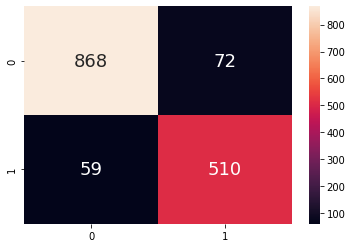

In [30]:
sb.heatmap(confusion_matrix(y_test, lr_y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

### KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_y_train_pred=knn.predict(X_train)
knn_y_test_pred=knn.predict(X_test)


In [34]:
accuracy_test=[]    
knn_acc = accuracy_score(knn_y_test_pred, y_test)
accuracy_test.append(knn_acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(knn_acc*100))
print(classification_report(y_test,knn_y_test_pred,target_names=['0','1']))

Test Accuracy :  91.25%  
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       940
           1       0.88      0.89      0.89       569

    accuracy                           0.91      1509
   macro avg       0.91      0.91      0.91      1509
weighted avg       0.91      0.91      0.91      1509



In [35]:
append_method_and_name('K-Nearest Neighbors',knn_acc*100)
score_method.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\915219466.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_method = score_method.append({"Method": method, "Score": score}, ignore_index=True)


,Method,Score
0,Random Forest,93.638171
1,Logistic Regression,91.318754
2,K-Nearest Neighbors,91.252485


In [36]:
knn_f1 = f1_score(y_test, knn_y_test_pred)  
f1_scores('K-Nearest Neighbors',knn_f1*100)
 
f1Score.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\3397138116.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1Score=f1Score.append({"Method":method, "F1-Score":f1score},ignore_index=True)


,Method,F1-Score
0,Random Forest,91.351351
1,Logistic Regression,88.618593
2,K-Nearest Neighbors,88.501742


Text(0, 0.5, 'Accuracy Score')

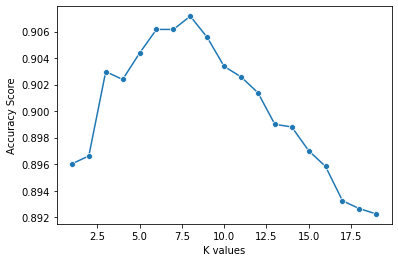

In [37]:
from sklearn.model_selection import cross_val_score

k_values=list(range(1,20))
scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=5)
    scores.append(np.mean(score))
    
sb.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K values")
plt.ylabel('Accuracy Score')

In [38]:
bestdf=pd.DataFrame(scores,columns=['Accuracy Score'])
bestdf.head()

,Accuracy Score
0,0.896024
1,0.896620
2,0.902982
3,0.902386
4,0.904374


In [39]:
best_index=np.argmax(scores)
knnBest=KNeighborsClassifier(n_neighbors=best_index)
knnBest.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
knnBest_y_test_pred=knnBest.predict(X_test)

accuracy_test=[]    
knnB_acc = accuracy_score(knnBest_y_test_pred, y_test)
accuracy_test.append(knnB_acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(knnB_acc*100))
print(classification_report(y_test,knnBest_y_test_pred,target_names=['0','1']))

Test Accuracy :  90.72%  
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       940
           1       0.86      0.91      0.88       569

    accuracy                           0.91      1509
   macro avg       0.90      0.91      0.90      1509
weighted avg       0.91      0.91      0.91      1509



<AxesSubplot:>

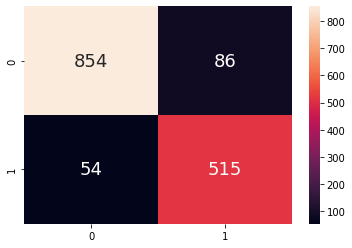

In [41]:
sb.heatmap(confusion_matrix(y_test, knnBest_y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

### Support Vector Machine

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [43]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [44]:
cols = X_train.columns
Xd_train = pd.DataFrame(X_train_std, columns=[cols])
Xd_train.describe()

,url_length,num_dash,num_dot,num_ampersand,num_at,num_colon,num_semicolon,num_special_character,num_numeric,num_sensitive_words,path_length,path_level,hostname_length,use_top_domain_level,is_https,has_ip_address,query_length,num_query,num_iframe,num_external_url,num_external_domain,num_external_resource_call,num_null_self_redirect_hyperlink,num_submit_info_to_email,is_frequent_domain_name_mismatch,has_insecure_form,num_ext_meta_scipt_link,num_dns_record,num_redirect,has_ext_favicon,domain_age,is_indexed,is_ssl_certificated
count,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03,3.521000e+03
mean,-1.770492e-17,1.191890e-17,-3.764857e-17,2.104253e-16,1.033736e-15,-4.026726e-16,2.067203e-16,2.177563e-16,-1.829141e-16,5.369652e-16,4.445307e-16,1.590053e-16,2.087856e-16,-5.441701e-16,1.437835e-16,-8.332900e-16,-1.572474e-16,3.720713e-17,8.929712e-17,2.472067e-17,3.860082e-16,2.554049e-16,3.963427e-16,-2.025818e-16,4.073866e-17,-2.193171e-16,-5.063954e-17,2.302428e-16,-2.678283e-16,-4.101298e-16,2.289027e-16,2.479950e-16,-1.347024e-16
std,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00
min,-7.920911e-01,-5.045815e-01,-1.880524e+00,-1.847350e-01,-1.126004e-01,-1.189054e-01,-1.111294e-01,-1.285476e+00,-2.940913e-01,-2.468705e-01,-8.355317e-01,-1.332390e+00,-2.498805e+00,-1.920525e+00,-1.270416e+00,-6.756410e-02,-1.745944e-01,-2.600154e-01,-4.535282e-01,-3.958790e-01,-6.086073e-01,-5.332652e-01,-9.073529e-02,-9.785975e-02,-5.789900e-01,-1.524764e-01,-4.898528e-01,-8.430388e-01,-8.086304e-01,-3.788840e-01,-1.383416e+00,-3.491026e+00,-1.559415e+00
25%,-4.276669e-01,-5.045815e-01,-2.653697e-01,-1.847350e-01,-1.126004e-01,-1.189054e-01,-1.111294e-01,-5.944592e-01,-2.940913e-01,-2.468705e-01,-8.355317e-01,-7.429507e-01,-5.506997e-01,5.206910e-01,-1.270416e+00,-6.756410e-02,-1.745944e-01,-2.600154e-01,-4.535282e-01,-3.958790e-01,-6.086073e-01,-5.332652e-01,-9.073529e-02,-9.785975e-02,-5.789900e-01,-1.524764e-01,-4.898528e-01,-8.430388e-01,-8.086304e-01,-3.788840e-01,-9.657879e-01,2.864487e-01,-1.559415e+00
50%,-2.174221e-01,-5.045815e-01,-2.653697e-01,-1.847350e-01,-1.126004e-01,-1.189054e-01,-1.111294e-01,-2.489506e-01,-2.940913e-01,-2.468705e-01,-2.322183e-01,-1.535119e-01,-1.610788e-01,5.206910e-01,7.871437e-01,-6.756410e-02,-1.745944e-01,-2.600154e-01,-4.535282e-01,-3.650151e-01,-3.456579e-01,-3.441848e-01,-9.073529e-02,-9.785975e-02,-5.789900e-01,-1.524764e-01,-3.514259e-01,1.826487e-01,-8.086304e-01,-3.788840e-01,7.828308e-02,2.864487e-01,6.412663e-01
75%,1.049532e-01,-2.428103e-02,5.422074e-01,-1.847350e-01,-1.126004e-01,-1.189054e-01,-1.111294e-01,4.420664e-01,-7.769812e-02,-2.468705e-01,4.088022e-01,4.359269e-01,3.584159e-01,5.206910e-01,7.871437e-01,-6.756410e-02,-1.745944e-01,-2.600154e-01,1.424310e-01,-3.168442e-02,1.802410e-01,2.085118e-01,-6.283807e-02,-9.785975e-02,1.727146e+00,-1.524764e-01,2.022818e-01,1.826487e-01,1.222174e+00,-3.788840e-01,9.135399e-01,2.864487e-01,6.412663e-01
max,2.614727e+01,1.102263e+01,1.750133e+01,1.845567e+01,1.712506e+01,2.628346e+01,2.923538e+01,1.357139e+01,2.296818e+01,1.312591e+01,1.390794e+01,1.458246e+01,1.334578e+01,5.206910e-01,7.871437e-01,1.480076e+01,3.352073e+01,1.272600e+01,1.146566e+01,1.889409e+01,1.569426e+01,2.475988e+01,4.306627e+01,4.112301e+01,1.

In [45]:
svc=SVC(kernel='linear')
svc.fit(X_train_std,y_train)
svc_y_test_pred=svc.predict(X_test_std)

In [46]:
accuracy_test=[]    
svc_acc = accuracy_score(svc_y_test_pred, y_test)
accuracy_test.append(svc_acc) 
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(svc_acc*100))
print(classification_report(y_test,svc_y_test_pred,target_names=['0','1']))

Test Accuracy :  91.45%  
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       940
           1       0.87      0.91      0.89       569

    accuracy                           0.91      1509
   macro avg       0.91      0.91      0.91      1509
weighted avg       0.92      0.91      0.91      1509



In [47]:
append_method_and_name('Support Vector Machine',svc_acc*100)
score_method.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\915219466.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_method = score_method.append({"Method": method, "Score": score}, ignore_index=True)


,Method,Score
0,Random Forest,93.638171
1,Logistic Regression,91.318754
2,K-Nearest Neighbors,91.252485
3,Support Vector Machine,91.451292


In [48]:
svm_f1 = f1_score(y_test, svc_y_test_pred)  
f1_scores('Support Vector Machine',svm_f1*100)
 
f1Score.head()

C:\Users\Destyn\AppData\Local\Temp\ipykernel_9004\3397138116.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1Score=f1Score.append({"Method":method, "F1-Score":f1score},ignore_index=True)


,Method,F1-Score
0,Random Forest,91.351351
1,Logistic Regression,88.618593
2,K-Nearest Neighbors,88.501742
3,Support Vector Machine,88.927039


In [49]:
print('Training set score: {:.4f}'.format(svc.score(X_train_std, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test_std, y_test)))

Training set score: 0.9094
Test set score: 0.9145


<AxesSubplot:>

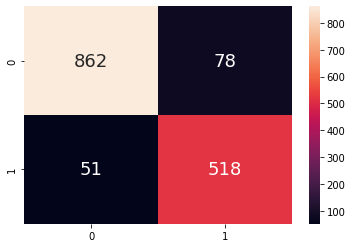

In [50]:
sb.heatmap(confusion_matrix(y_test, svc_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### HyperParameter tuning with GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

svm=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(svm,param_grid,refit = True, verbose = 3,n_jobs=-1)

In [52]:
grid.fit(X_train_std,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [53]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [54]:
grid_svc = grid.predict(X_test_std)
accuracy_score(y_test,grid_svc)*100

91.65009940357854

In [55]:
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       940
           1       0.88      0.90      0.89       569

    accuracy                           0.92      1509
   macro avg       0.91      0.91      0.91      1509
weighted avg       0.92      0.92      0.92      1509



In [56]:
bestsvc=SVC(C=10, gamma= 0.01,kernel='rbf')
bestsvc.fit(X_train_std,y_train)

SVC(C=10, gamma=0.01)

In [57]:
bestsvc_y_test_pred=bestsvc.predict(X_test_std)

accuracy_test=[]    
svcB_acc = accuracy_score(bestsvc_y_test_pred, y_test)
accuracy_test.append(svcB_acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(svcB_acc*100))
print(classification_report(y_test,bestsvc_y_test_pred,target_names=['0','1']))

Test Accuracy :  90.92%  
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       940
           1       0.87      0.90      0.88       569

    accuracy                           0.91      1509
   macro avg       0.90      0.91      0.90      1509
weighted avg       0.91      0.91      0.91      1509



In [58]:
print('Training set score: {:.4f}'.format(bestsvc.score(X_train_std, y_train)))

print('Test set score: {:.4f}'.format(bestsvc.score(X_test_std, y_test)))

Training set score: 0.9321
Test set score: 0.9092


<AxesSubplot:>

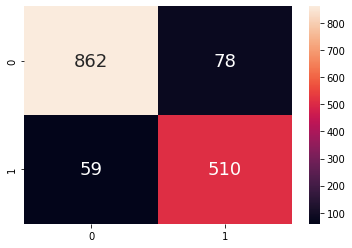

In [59]:
sb.heatmap(confusion_matrix(y_test, bestsvc_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Install these before running


In [60]:
# pip install python-whois
# pip install dnspython
# pip install -U selenium

### URL Prediction

In [61]:
import re
from urllib.parse import urlparse, parse_qs
from bs4 import BeautifulSoup
from selenium import webdriver
import urllib
from urllib.parse import urlparse
import pandas as pd
import requests
import tldextract
import dns.resolver
import time
import whois
import pandas as pd
import signal
from datetime import datetime

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By

import ssl
import socket

class UrlFeatures:
    def __init__(self, url):
        try:            
            op = webdriver.ChromeOptions()
            
            op.add_argument('--disable-javascript')
            op.add_argument('headless')
            
            browser = webdriver.Chrome(options=op)

            # get source code
            browser.get(url)
            
            # count number of redirect and different redicet domain
            self.redirect_count = 0
            self.diff_redirect_count = 0
            self.ports = []
            
            org_url = urlparse(url)
            org_domain = org_url.netloc
            
            while True:
                current_url = browser.current_url
                if current_url == url:
                    break

                self.redirect_count += 1
                curr_parsed_url = urlparse(current_url)
                curr_domain = curr_parsed_url.netloc
                curr_port = curr_parsed_url.port
                if curr_port != None:
                    self.port.append(curr_parsed_url.port)
                if curr_domain != org_domain: self.diff_redirect_count += 1
                
                url = current_url

                browser.refresh()
            
            
            
            html = browser.page_source
            time.sleep(2)

# close web browser
            browser.close()
            
            self.url = url
            self.soup = BeautifulSoup(html, 'html.parser')
            self.input = []
            self.findUrlLength()
            self.findNumDash()
            self.findNumDot()
            self.findNumAmpersand()
           # self.findNumPercent()
           # self.findNumUnderscore()
            self.findNumAt()
           # self.findNumHashtag()
            self.findNumColon()
            self.findNumSemicolon()
            #self.findNumDoubleDash()
            self.findNumSpecialCharacter()
            self.findNumNumericChars()
            self.findNumSensitiveWords()
            self.findPathLength()
            self.findPathLevel()
            self.findHostnameLength()
            self.useTopLevelDomain()
            self.checkIsHttps()
            self.hasIpAddress()
            self.countQueryLength()
            self.countNumQuery()
            self.countNumIframes()
           # self.countNumEmbed()
            self.countNumExternalUrl()
            self.countNumExternalDomain()
            self.countNumExternalResourceCall()
            self.countNumNullSelfRedirectHyperlinks()
            self.countInfoEmailSubmission()
            self.checkFrequentDomainNameMismatch()
            self.hasInsecureForm()
            self.countExtMetaScriptLink()
            self.countDnsRecord()
            self.numRedirect()
           # self.numDiffRedirectDomain()
           # self.isRightClickDissabled()
            self.detectExtFavicon()
           # self.checkIsDomainRegistered()
           # self.checkIsRegistrarVisible()
            self.findDomainAge()
            self.checkIsIndexed()
            self.checkHasSslCertificate()
           # self.checkIsPrivacyProtected()
           # self.checkHasOnmouseover()
            
        except Exception as e:
            raise Exception(e)
        
    # Get URL's Length
    def findUrlLength(self):
        self.input.append(len(self.url))
    
    # Count number of "-" in URL
    def findNumDash(self):
        self.input.append(self.url.count('-'))
        
    # Count number of "." in URL
    def findNumDot(self):
        self.input.append(self.url.count('.'))
        
    # Count number of "&" in URL
    def findNumAmpersand(self):
        self.input.append(self.url.count('&'))
        
    # Count number of "%" in URL
    def findNumPercent(self):
        self.input.append(self.url.count('%'))
        
    # Count number of "_" in URL
    def findNumUnderscore(self):
        self.input.append(self.url.count('_'))
        
    # Count number of "@" in URL
    def findNumAt(self):
        self.input.append(self.url.count('@'))
        
    # Count number of "#" in URL
    def findNumHashtag(self):
        self.input.append(self.url.count('#'))
        
    # Count number of ":" in URL
    def findNumColon(self):
        self.input.append(self.url.count(':'))
        
    # Count number of ";" in URL
    def findNumSemicolon(self):
        self.input.append(self.url.count(';'))
        
    # Count number of "//" in URL
    def findNumDoubleDash(self):
        self.input.append(self.url.count('//'))
        
    # Count number of special characters in URL
    def findNumSpecialCharacter(self):
        res = self.url.count('$')
        res += self.url.count('-')
        res += self.url.count('_')
        res += self.url.count('.')
        res += self.url.count('+')
        res += self.url.count('*')
        res += self.url.count("'")
        res += self.url.count("\"")
        res += self.url.count("(")
        res += self.url.count(")")

        self.input.append(res)
        
    # Count number numeric characters in URL
    def findNumNumericChars(self):
        count = 0
        for char in self.url:
            if char.isnumeric(): count += 1
        self.input.append(count)
        
    # Count number of sensitive words in URL
    def findNumSensitiveWords(self):
        count = 0
        sensitiveWords = ["secure", "account", "webscr", "login", "ebayisapi", "signin", "banking", "confirm", "register", "update", "verify"]
        for word in sensitiveWords:
            count += self.url.count(word)

        self.input.append(count)

    # Count number of characters in URL path string
    def findPathLength(self):
        parsed_url = urlparse(self.url)
        path = parsed_url.path
        path_length = len(path)

        self.input.append(path_length)
        
    # Count the depth of the path in URL
    def findPathLevel(self):
        parsed_url = urlparse(self.url)
        path = parsed_url.path
        path_depth = path.count('/')

        self.input.append(path_depth)
        
    # Check if webpage URL use top level domain (.com, .org, etc). Return 1 if true
    def useTopLevelDomain(self):
        tlds = {"com", "org", "net", "gov", "edu", "int", "mil", "io", "sg", "museum", "pro", "uk", "ca", "au", "de", "jp", "us", "fr", "it", "nl", "be"}
        extracted_info = tldextract.extract(self.url)
        tld = extracted_info.suffix
        use_top_level_domain = 0
        if tld in tlds: use_top_level_domain = 1

        self.input.append(use_top_level_domain)
        
    # Check if url uses HTTPS protocol
    def checkIsHttps(self):
        protocol = self.url[0:8].lower()
        if protocol == "https://": res = 1
        else: res = 0
        
        self.input.append(res)
        
    # Detect pressence of IP address in the URL
    def hasIpAddress(self):
        ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
        res = re.search(ip_pattern, self.url)
        if res: self.input.append(1)
        else: self.input.append(0)
        
    # Count URL's query parameters number of characters 
    def countQueryLength(self):
        parsedUrl = urlparse(self.url)
        queryString = parsedUrl.query
        queryParams = parse_qs(queryString)
        queryLength = sum(len(value[0]) for value in queryParams.values())
  
        self.input.append(queryLength)
        
    # Count number of queries on the URL
    def countNumQuery(self):
        parsed_url = urlparse(self.url)
        query_string = parsed_url.query
        query_params = parse_qs(query_string)
        num_queries = len(query_params)

        self.input.append(num_queries)
        
    # Count the characters length of the host name
    def findHostnameLength(self):
        parsedUrl = urlparse(self.url)
        hostname = parsedUrl.hostname
        if hostname:
            hostnameLength = len(hostname)
            self.input.append(hostnameLength)
        else:
            self.input.append(0)
    
    # Count number of iframe tags on html
    def countNumIframes(self):
        iframes = self.soup.find_all('iframe')
        self.input.append(len(iframes))
        
    # Count number of ember tags on html
    def countNumEmbed(self):
        embed = self.soup.find_all('embed')
        self.input.append(len(embed))
        
    # Count number of external url on html
    def countNumExternalUrl(self):
        anchor_tags = self.soup.find_all('a')
        count = 0
        
        org_url = urlparse(self.url)
        org_domain = org_url.netloc

        for tag in anchor_tags:
            href = tag.get('href')
            if href:
                parsed_url = urlparse(href)
                if parsed_url.netloc != org_domain:  # Check if netloc (domain) is present
                    count += 1

        self.input.append(count)
        
    # Count number of external resource link (src and href) on html
    def countNumExternalDomain(self):
        external_resources = []

        external_resources += self.soup.find_all(['script', 'link'], attrs={'src': True})
        external_resources += self.soup.find_all(['script', 'link'], attrs={'href': True})
        
        org_url = urlparse(self.url)
        org_domain = org_url.netloc

        unique_domains = set()


        for resource in external_resources:
            resource_url = resource.get('src') or resource.get('href')
            if resource_url:
                parsed_url = urlparse(resource_url)
                domain = parsed_url.netloc
                if domain and domain != org_domain:
                    unique_domains.add(domain)

        self.input.append(len(unique_domains))
        
    # Count number of external resource link (src and href) on img, script and link
    def countNumExternalResourceCall(self):
        external_resources = []

        external_resources += self.soup.find_all(['img', 'script', 'link'], attrs={'src': True})
        external_resources += self.soup.find_all(['img', 'script', 'link'], attrs={'href': True})

        self.input.append(len(external_resources))
        
    # Count number of empty external resource link (src and href) on img, script and link
    def countNumEmptyExternalResource(self):
        external_resources = []

        external_resources += self.soup.find_all(['img', 'script', 'link'], attrs={'src': True})
        external_resources += self.soup.find_all(['img', 'script', 'link'], attrs={'href': True})
        
        count = 0
        for e in external_resources:
            if e != None and e.strip() == "" or e.strip() == "#" or e == "about:blank": count += 1

        self.input.append(count)
    
    # Count number of null self redirect hyperlinks on html
    def countNumNullSelfRedirectHyperlinks(self):
        anchor_tags = self.soup.find_all('a')
        null_self_redirect_count = 0

        # Iterate through anchor tags and check if the URLs are null self-redirects
        for tag in anchor_tags:
            href = tag.get('href')
            if href == "" or href == "#" or href == "./" or href == "./#":
                null_self_redirect_count += 1

        self.input.append(null_self_redirect_count)
        
    # Count number of HTML mailto function (attribute to send information through email)
    def countInfoEmailSubmission(self):
        mailto_links = self.soup.find_all(lambda tag: re.search(r'mailto:', tag.text))
        num_mailto_links = len(mailto_links)
        self.input.append(num_mailto_links)
        
    # Check if the most frequent domain names in the HTML mismatch with the URL Webpage Domain (1 if Mismatch)
    def checkFrequentDomainNameMismatch(self):
        anchor_tags = self.soup.find_all('a')
        
        external_urls = []
        for tag in anchor_tags:
            href = tag.get('href')
            if href:
                parsed_url = urlparse(href)
                if parsed_url.netloc:  # Check if netloc (domain) is present (external link)
                    external_urls.append(parsed_url.geturl())

        domain_count = {}
        is_frequent_domain_name_mismatch=[]
        for url in external_urls:
            parsed_url = urlparse(url)
            domain = parsed_url.netloc
            domain_count[domain] = domain_count.get(domain, 0) + 1
        if len(domain_count) == 0:
            is_frequent_domain_name_mismatch.append(len(domain_count))
            #self.row['is_frequent_domain_name_mismatch'] = [0]

            return
        # Find the most frequent domain
        most_frequent_domain = max(domain_count, key=domain_count.get)

        # Compare the most frequent domain with the webpage URL's domain
        parsed_webpage_domain = urlparse(self.url)
        webpage_domain = parsed_webpage_domain.netloc
        mismatch = most_frequent_domain != webpage_domain
        if mismatch: mismatch = 1
        else: mismatch = 0
        self.input.append(mismatch)
        
    # Check if HTML document have forms that do not use HTTPS (1 if exist)
    def hasInsecureForm(self):
        form_elements = self.soup.find_all('form', action=True)
        insecure_action_found = 0


# Iterate through form elements and check the protocol of the action attribute
        for form in form_elements:
            action = form['action']
            parsed_url = urlparse(action)
            if parsed_url.scheme and parsed_url.scheme.lower() != 'https':
                insecure_action_found = 1
                break
            
        self.input.append(insecure_action_found)
        
    # Count number of meta, link tag, and script that contain external url
    def countExtMetaScriptLink(self):
        tags = self.soup.find_all(['meta', 'script', 'link'])
        external_url_count = 0
        
        #org_url = urlparse(self.url)

        for tag in tags:
            attrs_with_urls = []
            if tag.name == 'meta':
                attrs_with_urls = [tag.get('content')]
            elif tag.name == 'script':
                attrs_with_urls = [tag.get('src')]
            elif tag.name == 'link':
                attrs_with_urls = [tag.get('href')]

            for attr_value in attrs_with_urls:
                    if attr_value:
                        parsed_url = urlparse(attr_value)
                        if parsed_url.netloc:  # Check if netloc (domain) is present (external URL)
                            external_url_count += 1
        
        self.input.append(external_url_count)
            
    # Count DNS record of the webpage
    def countDnsRecord(self):
        parsed_url = urlparse(self.url)
        domain = parsed_url.netloc
        if domain.startswith("www."):
            domain = domain[4:]
            
        resolver = dns.resolver.Resolver()
        num_records = 0
        try:
            answer = dns.resolver.resolve(domain,'NS')
            num_records = len(answer)
        except:
            num_records = 0
        finally:
            self.input.append(num_records)
            
    # count number of URL redirect (can be used as url shortener or other)
    def numRedirect(self):
        self.input.append(self.redirect_count)
        
    
    def numDiffRedirectDomain(self):
        self.input.append(self.diff_redirect_count)
        
    # Check if website dissable right click
    def isRightClickDissabled(self):
        script_tags = self.soup.find_all(lambda tag: re.search(r'mailto:', tag.text))
        is_disabled = 0
        if len(script_tags) != 0: is_disabled = 1
        self.input.append(is_disabled)
        
    # Check if website uses external link for favicon
    def detectExtFavicon(self):
        favicon_links = self.soup.find_all('link', rel=['icon', 'shortcut icon'])
        hasExtFavicon = 0
        # Check if any of the favicon links have an external URL
        for link in favicon_links:
            favicon_url = link.get('href')
            parsed_url = urlparse(favicon_url)
            if parsed_url.netloc and parsed_url.netloc != urlparse(self.url).netloc:
                hasExtFavicon = 1
                break
        self.input.append(hasExtFavicon)
    
    # Check is Domain Registered
    def checkIsDomainRegistered(self):
        domain = urlparse(self.url).netloc
        isRegistered = 0
        try:
            w = whois.whois(domain)
        except:
            isRegistered = 0
        else:
            res = bool(w.domain_name)
            isRegistered =  1 if res == True else 0
        self.input.append(isRegistered)
    
    # Check if Domain Registrar Visible
    def checkIsRegistrarVisible(self):
        domain = urlparse(self.url).netloc
        res = 0
        try:
            w = whois.whois(domain)
            if w.registrar != None:
                res = 1
        except:
            res = 0
        self.input.append(res)
        
    # Find Domain Age in Months
    def findDomainAge(self):
        domain = urlparse(self.url).netloc
        age = 0
        try:
            domain_info = whois.whois(domain)
            creation_date = domain_info.creation_date
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            if creation_date:
                today = datetime.today()
                domain_age_in_days = (today - creation_date).days
                domain_age_in_years = domain_age_in_days / 365
                age = int(domain_age_in_years)
            else:
                age = 0
        except:
            age = 0
        self.input.append(age)
        
    def checkIsPrivacyProtected(self):
        domain = urlparse(self.url).netloc
        res = 0
        try:
            domain_info = whois.whois(domain)
            
            # Check if the registrant information is masked
            if isinstance(domain_info.status, list) and "PRIVACY" in domain_info.status:
                res = 1
            elif isinstance(domain_info.status, str) and "PRIVACY" in domain_info.status:
                res = 1
            else:
                res = 0
        except:
            res = 0
        self.input.append(res)
        
    # Check if url indexed by prominent search engine such as Google and Bing
    def checkIsIndexed(self):
        website_url = self.url


        search_url = f"https://www.google.com/search?q=site:{website_url}"
        response = requests.get(search_url)
        res = 0
        if website_url in response.text:
            res = 1

        self.input.append(res)
        
    # Check if website has SSL certificate
    def checkHasSslCertificate(self):
        hostname = urlparse(self.url).netloc
        res = False
        try:
            context = ssl.create_default_context()
            with socket.create_connection((hostname, 443)) as sock:
                with context.wrap_socket(sock, server_hostname=hostname) as ssl_sock:
                    res = True
        except:
            res =  False

        self.input.append(1 if res == True else 0)
        
    # Check if html has onmouseover attribute
    def checkHasOnmouseover(self):
        elements_with_onmouseover = self.soup.find_all(lambda tag: tag.has_attr('onmouseover'))
        res = 1 if len(elements_with_onmouseover) > 0 else 0
        self.input.append(res)
        
    
    
        
uf = UrlFeatures("https://www.chiefarchitect.com/")
test=uf.input

In [62]:
arr=np.array(test)
hori_arr=arr.reshape(1,-1)
#newdf=pd.DataFrame(arr,columns=['col'])
hori_arr
col=x.columns
newdf=pd.DataFrame(hori_arr,columns=[col])
newdf

,url_length,num_dash,num_dot,num_ampersand,num_at,num_colon,num_semicolon,num_special_character,num_numeric,num_sensitive_words,path_length,path_level,hostname_length,use_top_domain_level,is_https,has_ip_address,query_length,num_query,num_iframe,num_external_url,num_external_domain,num_external_resource_call,num_null_self_redirect_hyperlink,num_submit_info_to_email,is_frequent_domain_name_mismatch,has_insecure_form,num_ext_meta_scipt_link,num_dns_record,num_redirect,has_ext_favicon,domain_age,is_indexed,is_ssl_certificated
0,31,0,2,0,0,1,0,2,0,0,1,1,22,1,1,0,0,0,1,121,6,45,1,0,1,0,11,4,0,0,26,1,1


In [63]:
def get_prediction_from_url(test_url):
    features_test = UrlFeatures(test_url)
    # Output of the features_test is a vertical array
    col=x.columns # Extracting features name
    test=features_test.input
    arr=np.array(test)
    horizontal_arr=arr.reshape(1,-1)
    testdf=pd.DataFrame(horizontal_arr,columns=[col]) # Converting list into a Dataframe, match with feature names
    
    pred = rfBest.predict(testdf.values)
    
    if int(pred[0]) == 0:
        stat="SAFE"
        return stat
    
    elif int(pred[0]) == 1:
        
        stat="NOT SAFE"
        return stat
    else:
        stat="Not Valid"
        return stat

In [66]:
own_urls=['https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2',
          'https://www.geeksforgeeks.org/convert-python-list-to-numpy-arrays/',
          'https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0',
          'https://www.accofestival.co.il/am/googledocs/index.php/files/files/otherx.jpg/files/otherx.jpg/files/storage.swf/files/storage.swf/files/files/files/files/files/files/files/files/files/files/files/files/files/files/style.htm',
          'http://www.google.com/12@3/login?php']

for url in own_urls:
   print(get_prediction_from_url(url))

SAFE
SAFE
SAFE
NOT SAFE
NOT SAFE
